### Segmentação

In [8]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt

folha_papel = np.array(Image.open(r'..\images\folha_ponto_preto.jpg'))
finger_print = np.array(Image.open(r'..\images\morphology\fingerprint.tif'))
biel = np.array(Image.open(r'..\images\biel.png'))

In [82]:
def show_img2(img_original, img_new, title1, title2):
    fig = plt.figure(figsize=(10, 5))
    plt1 = plt.subplot(1, 2, 1)
    plt2 = plt.subplot(1, 2, 2)
    plt1.title.set_text(title1)
    plt2.title.set_text(title2)
    plt1.imshow(img_original, cmap='gray',vmin=0, vmax=255)
    plt2.imshow(img_new, cmap='gray',vmin=0, vmax=255)
    plt.subplots_adjust(wspace=0.5)

229.5


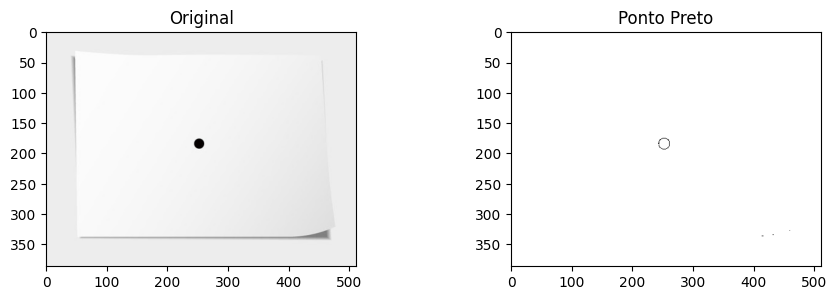

In [81]:
kernel_laplacian = np.array((
                            [-1,  -1, -1],
                            [-1, 8, -1],
                            [-1,  -1, -1]), dtype="int")

folha_laplacian = np.abs(cv2.filter2D(src= folha_papel, ddepth=-1, kernel=kernel_laplacian))

T = np.max(folha_laplacian)*0.9
folha_laplacian = np.where(folha_laplacian > T, 0, 255)

show_img2(folha_papel, folha_laplacian, "Original", "Ponto Preto")


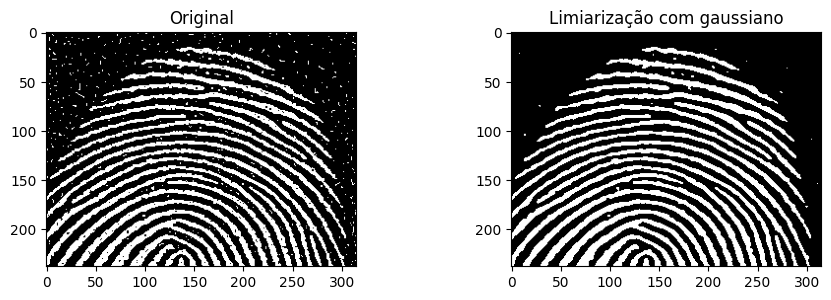

In [34]:
blur = cv2.GaussianBlur(finger_print,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_img2(finger_print, th3, "Original", "Limiarização com gaussiano")

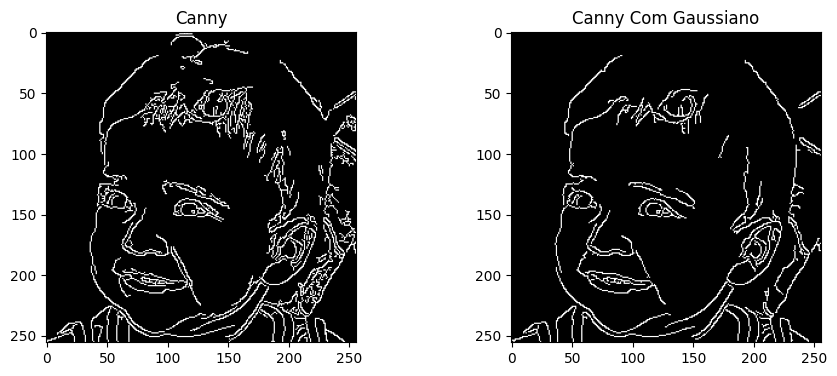

In [40]:
img_blur = cv2.GaussianBlur(biel, (3,3), 0)
img_canny_blur = cv2.Canny(image=img_blur, threshold1=50, threshold2=150, apertureSize = 3)
img_canny = cv2.Canny(image=biel, threshold1=50, threshold2=150, apertureSize = 3)

show_img2(img_canny, img_canny_blur, "Canny", "Canny Com Gaussiano")


#### Alteração parametro T1 = 100 e T2 = 10

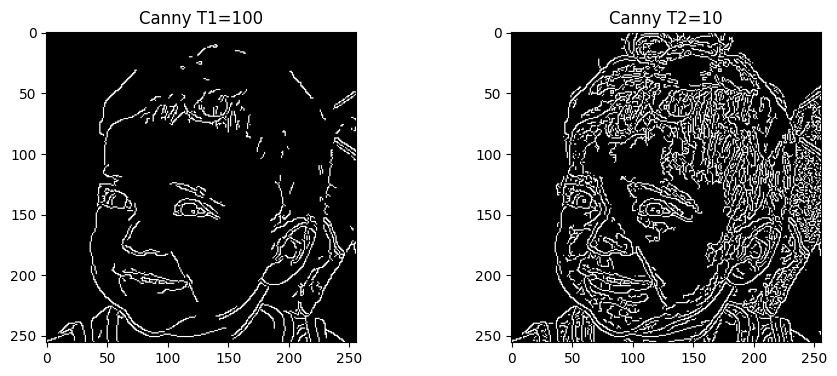

In [42]:
img_canny_T1 = cv2.Canny(image=biel, threshold1=100, threshold2=150, apertureSize = 3)
img_canny_T2 = cv2.Canny(image=biel, threshold1=50, threshold2=10, apertureSize = 3)

show_img2(img_canny_T1, img_canny_T2, "Canny T1=100", "Canny T2=10")